In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/ALK_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/ALK_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of Alkalinity

In [58]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [59]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [9]:
data_baseline_plot = data_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [10]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

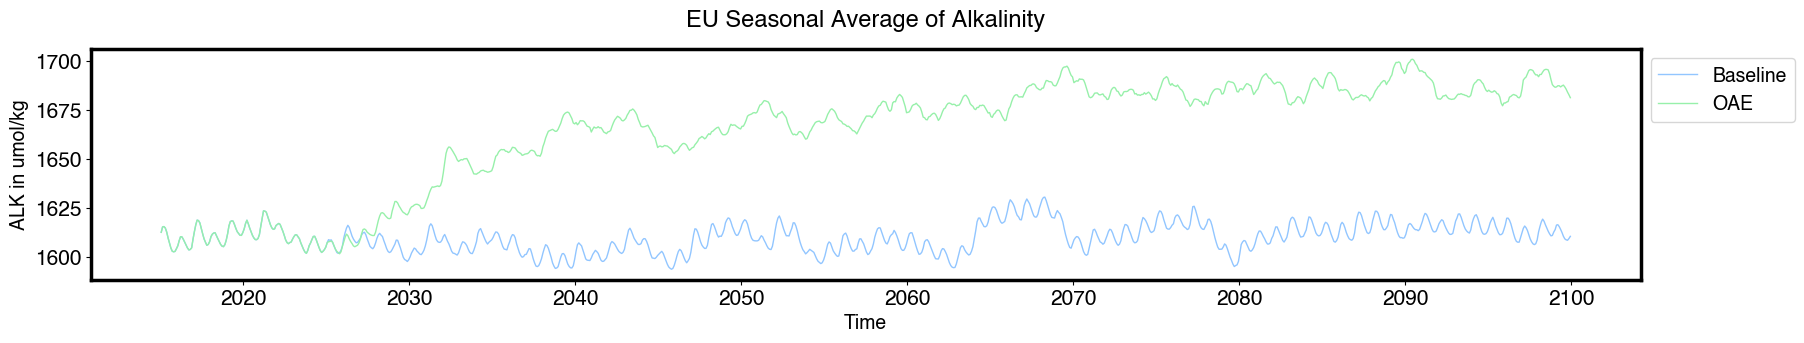

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.ALK, linewidth=1, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.ALK, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

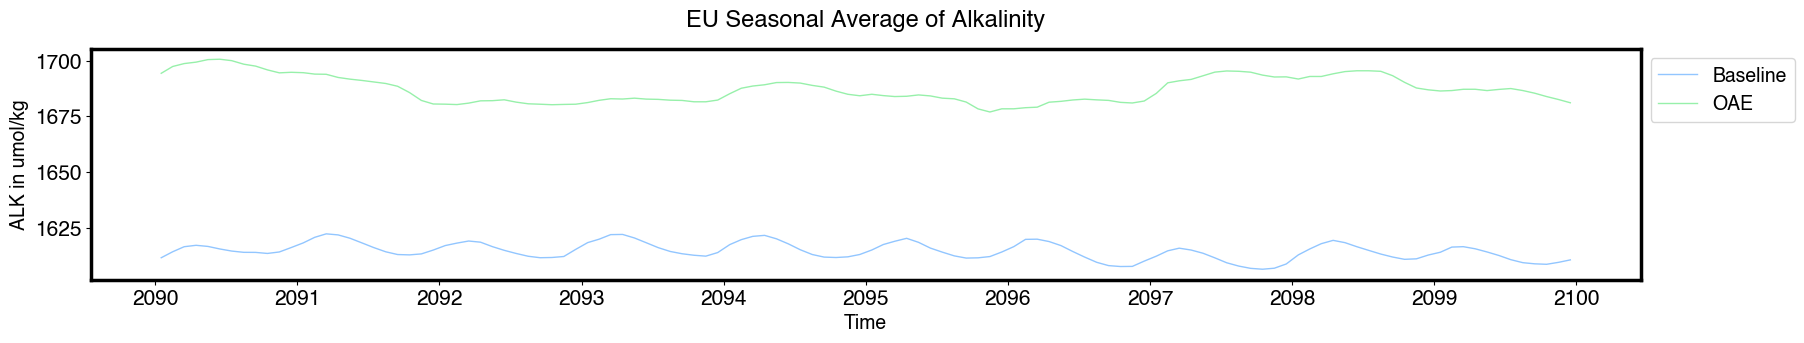

In [14]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of Alkalinity

In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ALK_baseline = data_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [16]:
ALK_season_summary_baseline = ALK_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
ALK_season_mean_all_years_baseline = ALK_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ALK_seasonal_mean_baseline = ALK_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [17]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ALK_oae = data_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [18]:
ALK_season_summary_oae = ALK_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
ALK_season_mean_all_years_oae = ALK_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ALK_seasonal_mean_oae = ALK_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

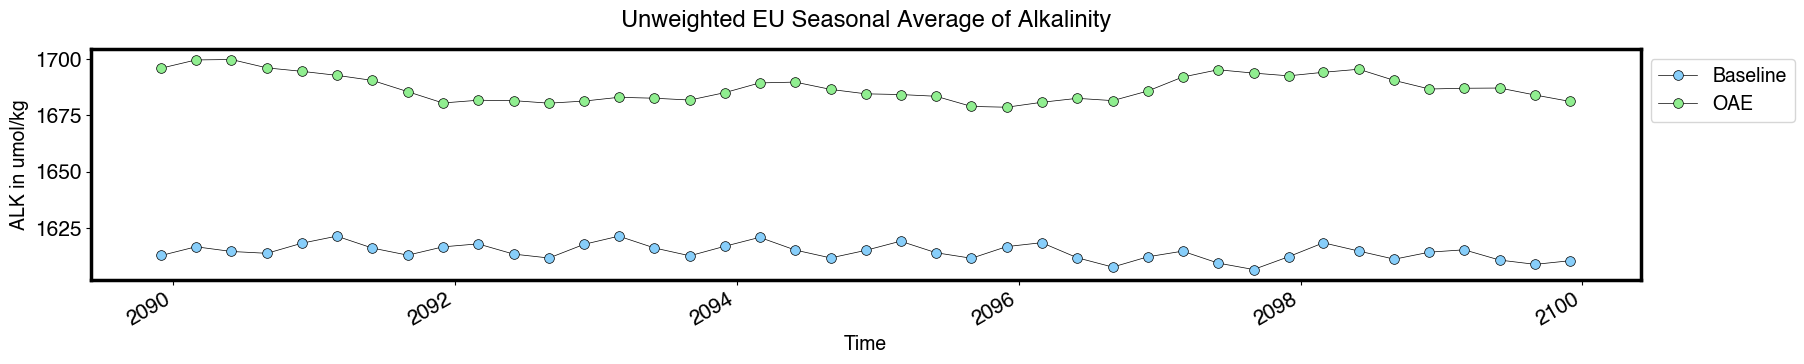

In [19]:
f, ax = plt.subplots(figsize=(20, 3))

ALK_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ALK_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity

In [20]:
month_length_baseline = ALK_baseline.time_counter.dt.days_in_month
ALK_weighted_mean_baseline = ((ALK_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
ALK_weighted_mean_baseline = ALK_weighted_mean_baseline.where(ALK_weighted_mean_baseline)
ALK_weighted_season_baseline = ALK_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [21]:
month_length_oae = ALK_oae.time_counter.dt.days_in_month
ALK_weighted_mean_oae = ((ALK_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
ALK_weighted_mean_oae = ALK_weighted_mean_oae.where(ALK_weighted_mean_oae)
ALK_weighted_season_oae = ALK_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

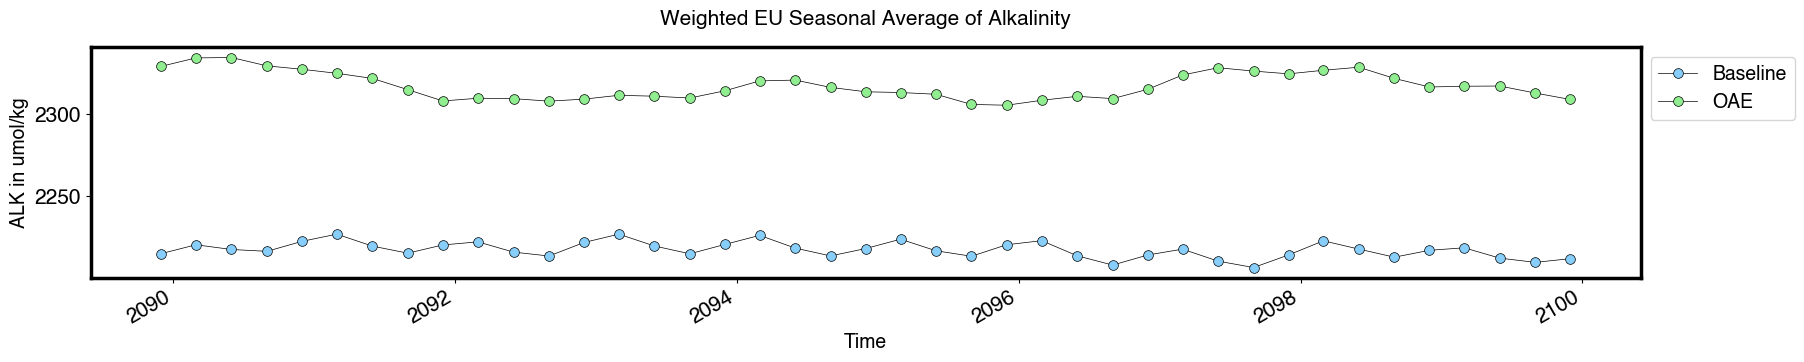

In [22]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
ALK_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ALK_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

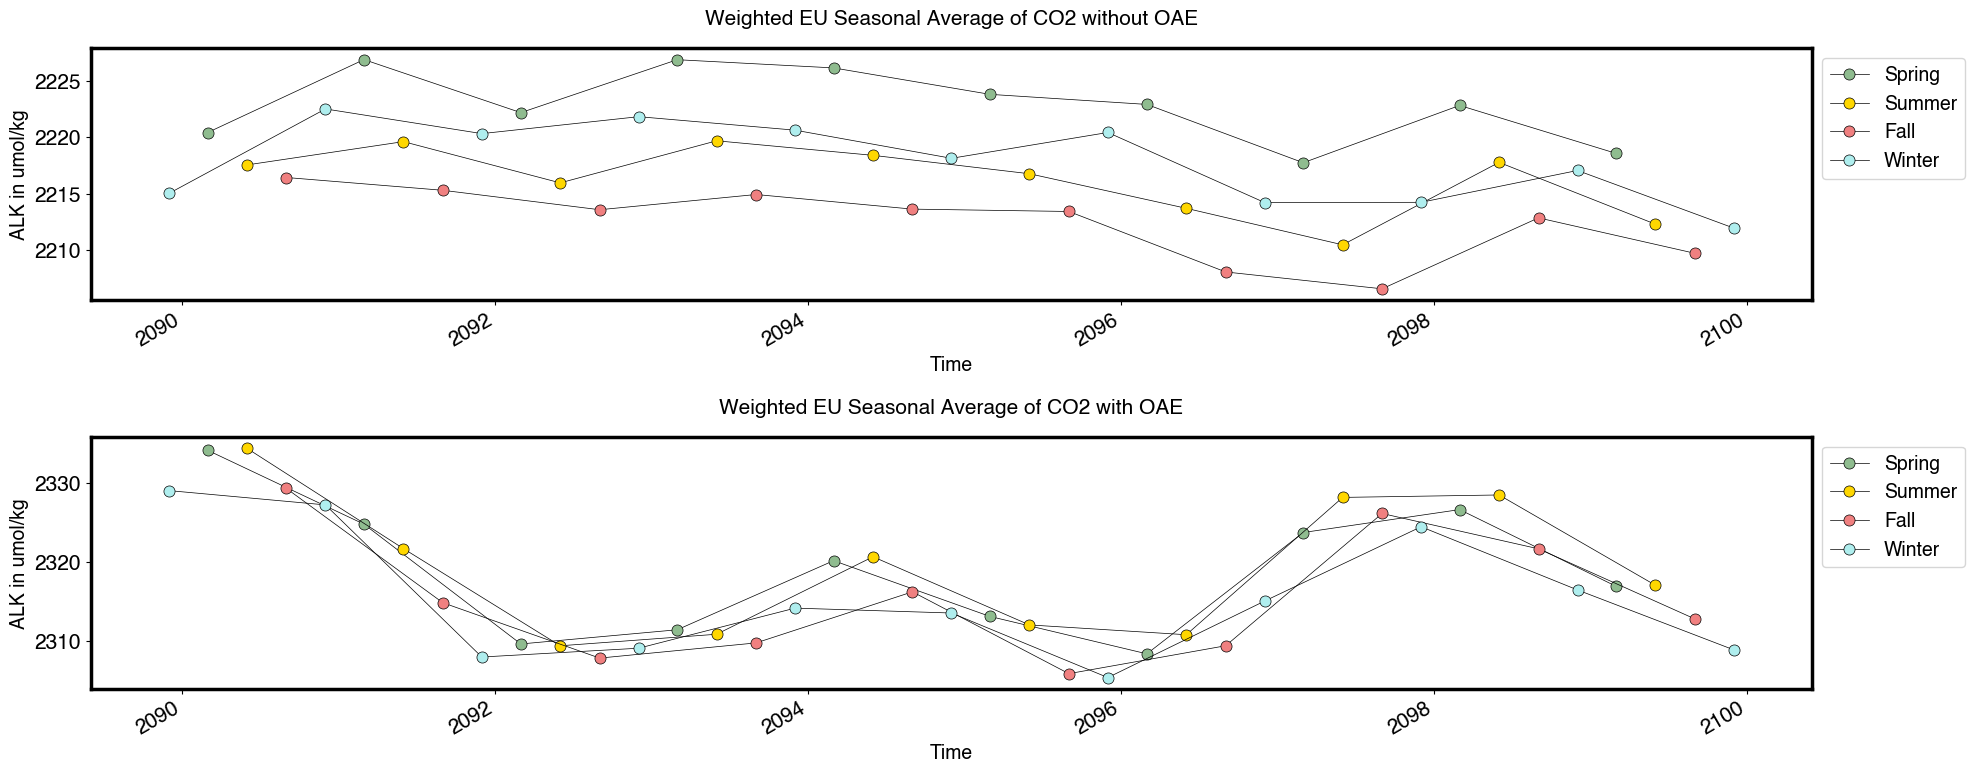

In [23]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in ALK_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity in umol/kg', fontsize=14)

for month, arr in ALK_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity in umol/kg', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of Alkalinity without OAE (seasons displayed)

In [32]:
ALK_weighted_baseline = ALK_weighted_season_baseline.to_dataframe('ALK')
ALK_weighted_baseline['Month'] = pd.DatetimeIndex(ALK_weighted_baseline.index).month

In [33]:
conditions = [
    (ALK_weighted_baseline['Month'] == 3),
    (ALK_weighted_baseline['Month'] == 6),
    (ALK_weighted_baseline['Month'] == 9),
    (ALK_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ALK_weighted_baseline['Month'] = np.select(conditions, values)

In [34]:
colors = dict(zip(ALK_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

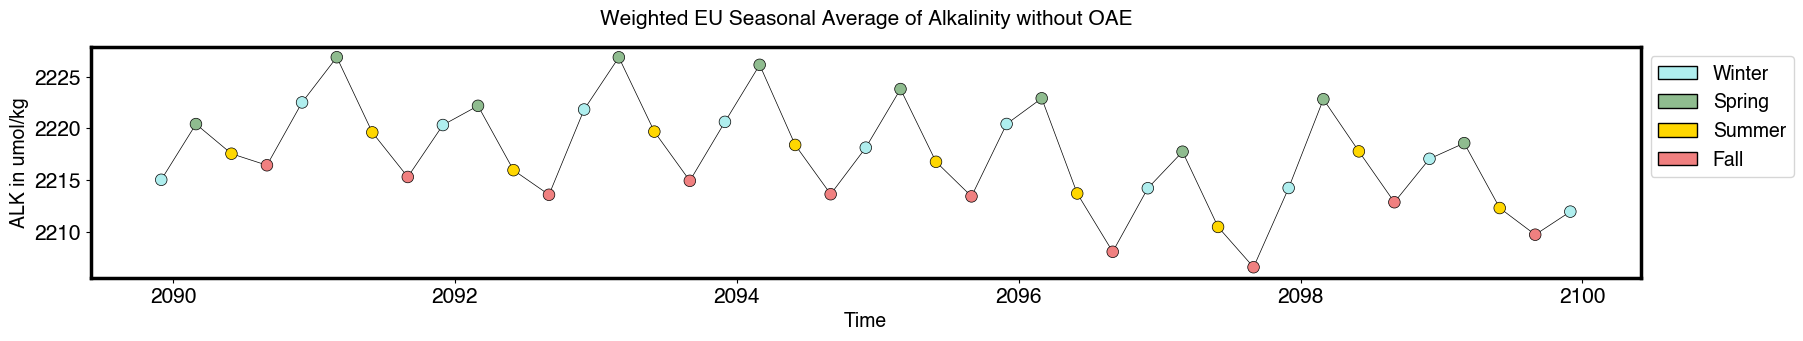

In [35]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ALK_weighted_baseline.index, ALK_weighted_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_weighted_baseline.index, ALK_weighted_baseline.ALK, color=ALK_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity with OAE (seasons displayed)

In [36]:
ALK_weighted_oae = ALK_weighted_season_oae.to_dataframe('ALK')
ALK_weighted_oae['Month'] = pd.DatetimeIndex(ALK_weighted_oae.index).month

In [37]:
conditions = [
    (ALK_weighted_oae['Month'] == 3),
    (ALK_weighted_oae['Month'] == 6),
    (ALK_weighted_oae['Month'] == 9),
    (ALK_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ALK_weighted_oae['Month'] = np.select(conditions, values)

In [38]:
colors = dict(zip(ALK_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

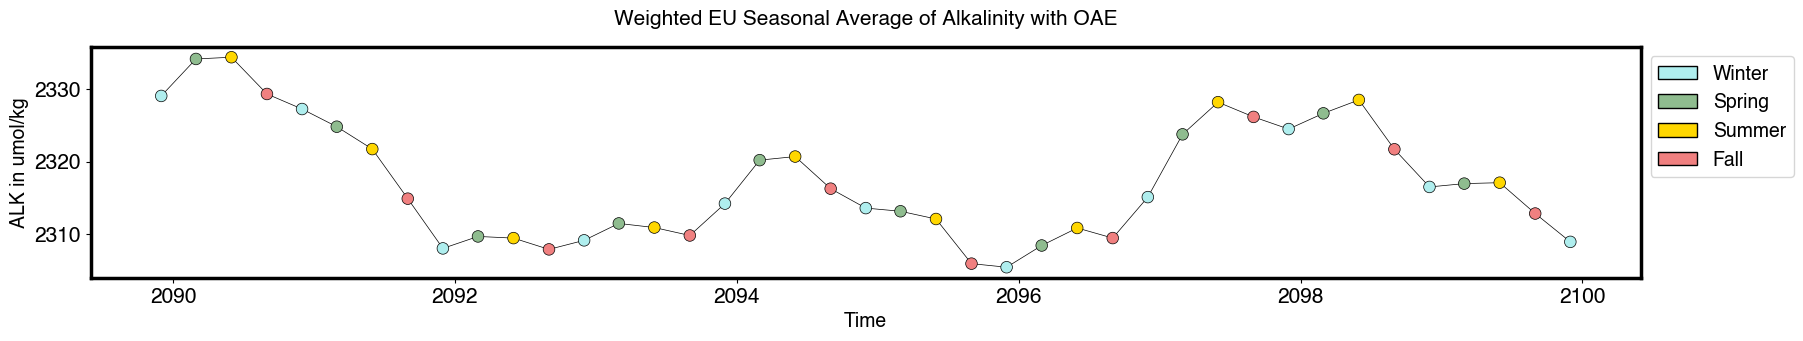

In [39]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ALK_weighted_oae.index, ALK_weighted_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_weighted_oae.index, ALK_weighted_oae.ALK, color=ALK_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

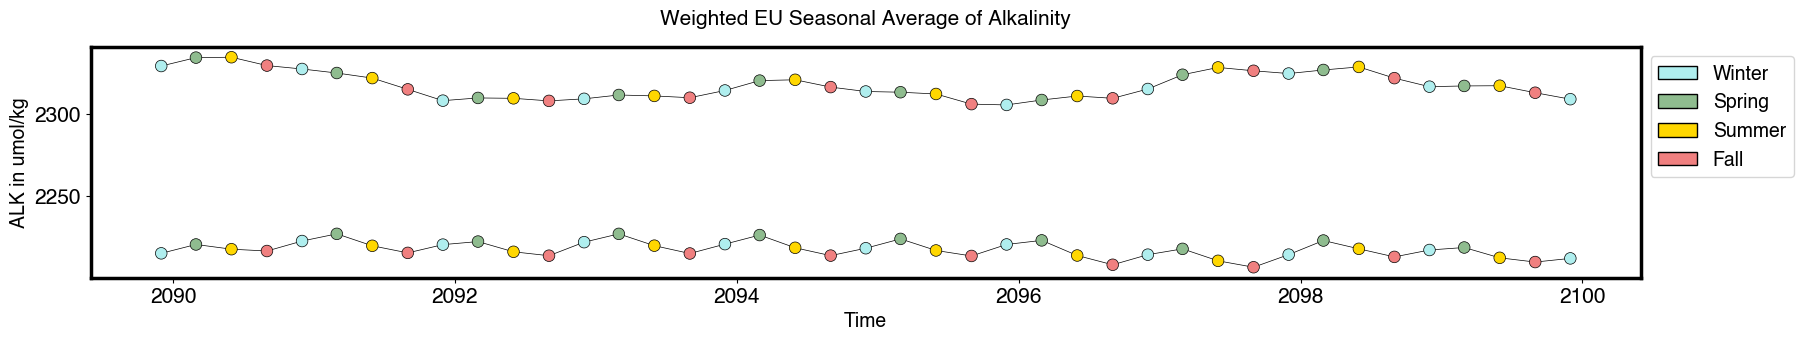

In [40]:
colors = dict(zip(ALK_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ALK_weighted_baseline.index, ALK_weighted_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_weighted_baseline.index, ALK_weighted_baseline.ALK, color=ALK_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(ALK_weighted_oae.index, ALK_weighted_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_weighted_oae.index, ALK_weighted_oae.ALK, color=ALK_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)

pass

### EU Monthly Averaged ALK for the last 10 years

In [41]:
mean_baseline = (sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ALK.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [42]:
mean_oae = (sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).ALK.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

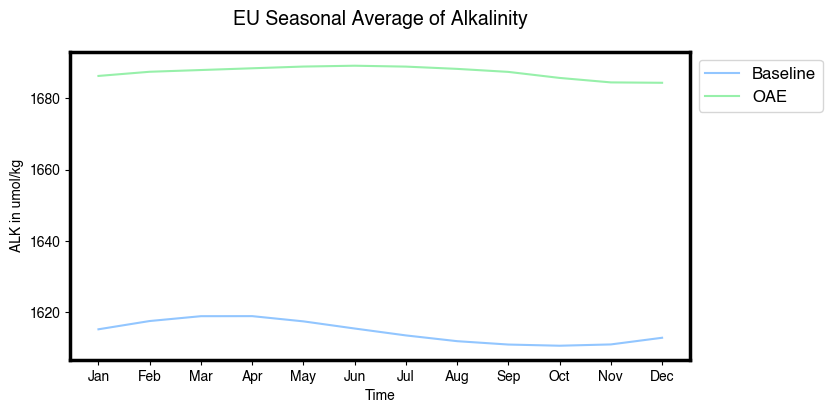

In [43]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.ALK, label='Baseline')
plt.plot(mean_oae.ALK, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel(" in umol/kg", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE

In [44]:
sliced_frame_baseline = sliced_frame_baseline.ALK.mean(dim=('deptht'))

In [45]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [46]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [47]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='ALK')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='ALK')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='ALK')

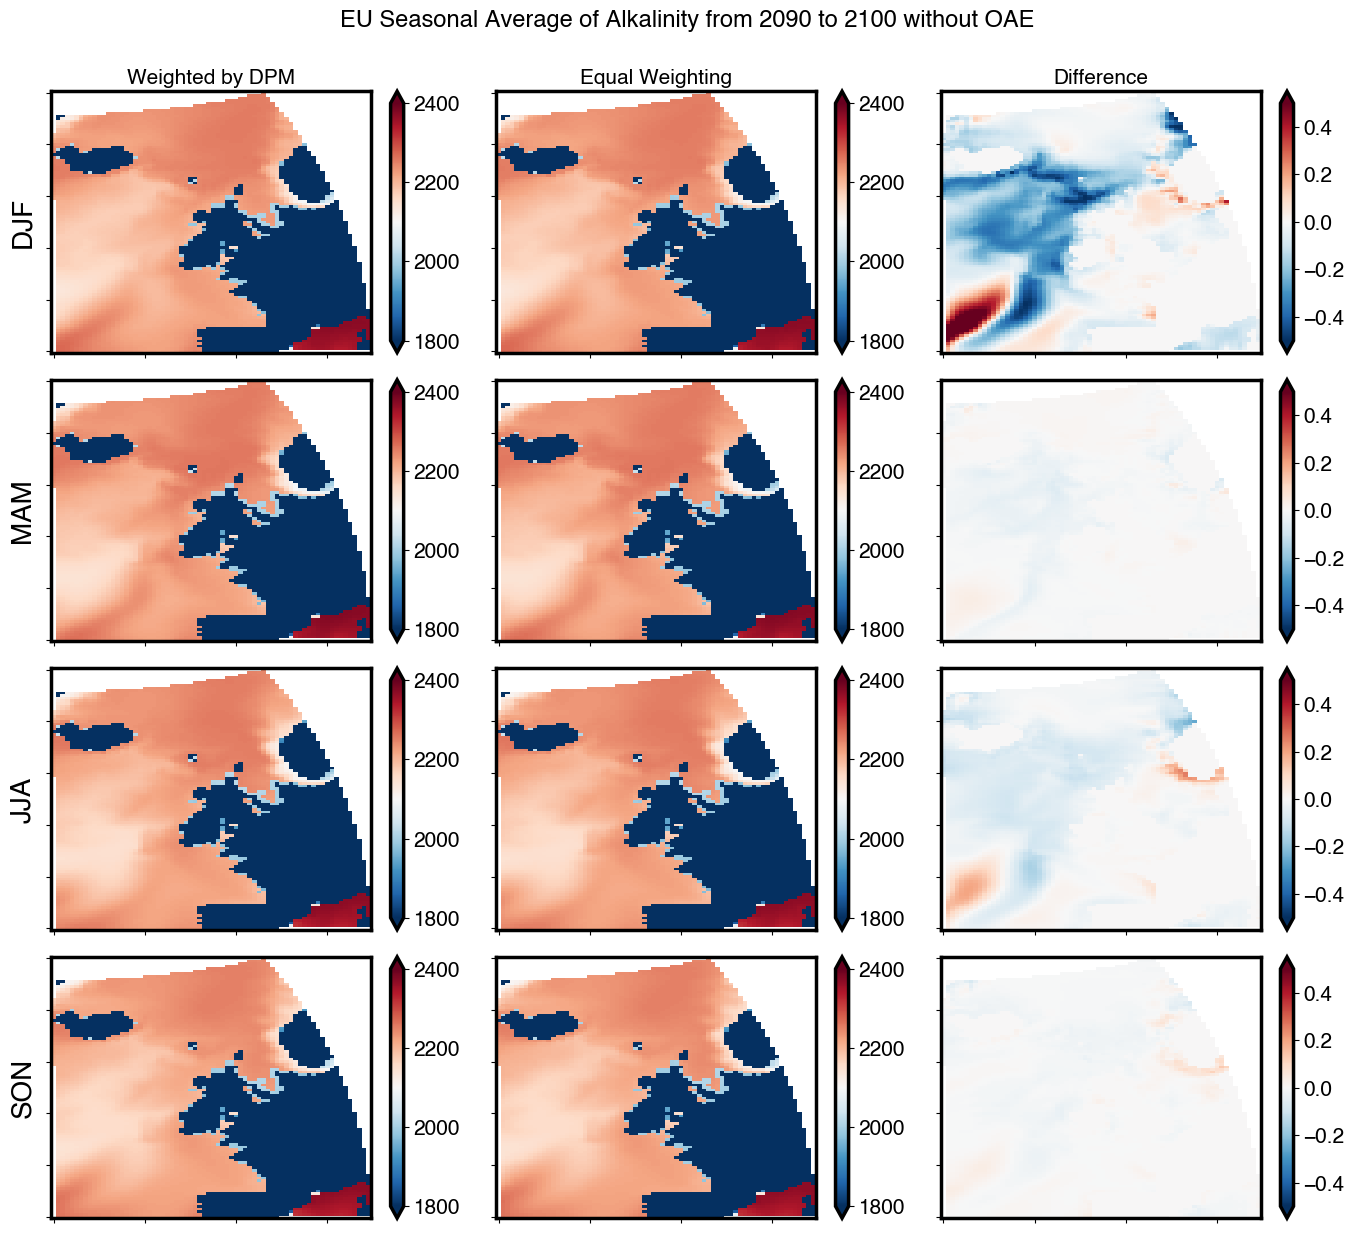

In [52]:
notnull = pd.notnull(ds_unweighted_baseline["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1800,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1800,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE

In [60]:
sliced_frame_oae = sliced_frame_oae.ALK.mean(dim=('deptht'))

In [61]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [62]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [63]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='ALK')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='ALK')
ds_diff_oae = ds_diff_oae.to_dataset(name='ALK')

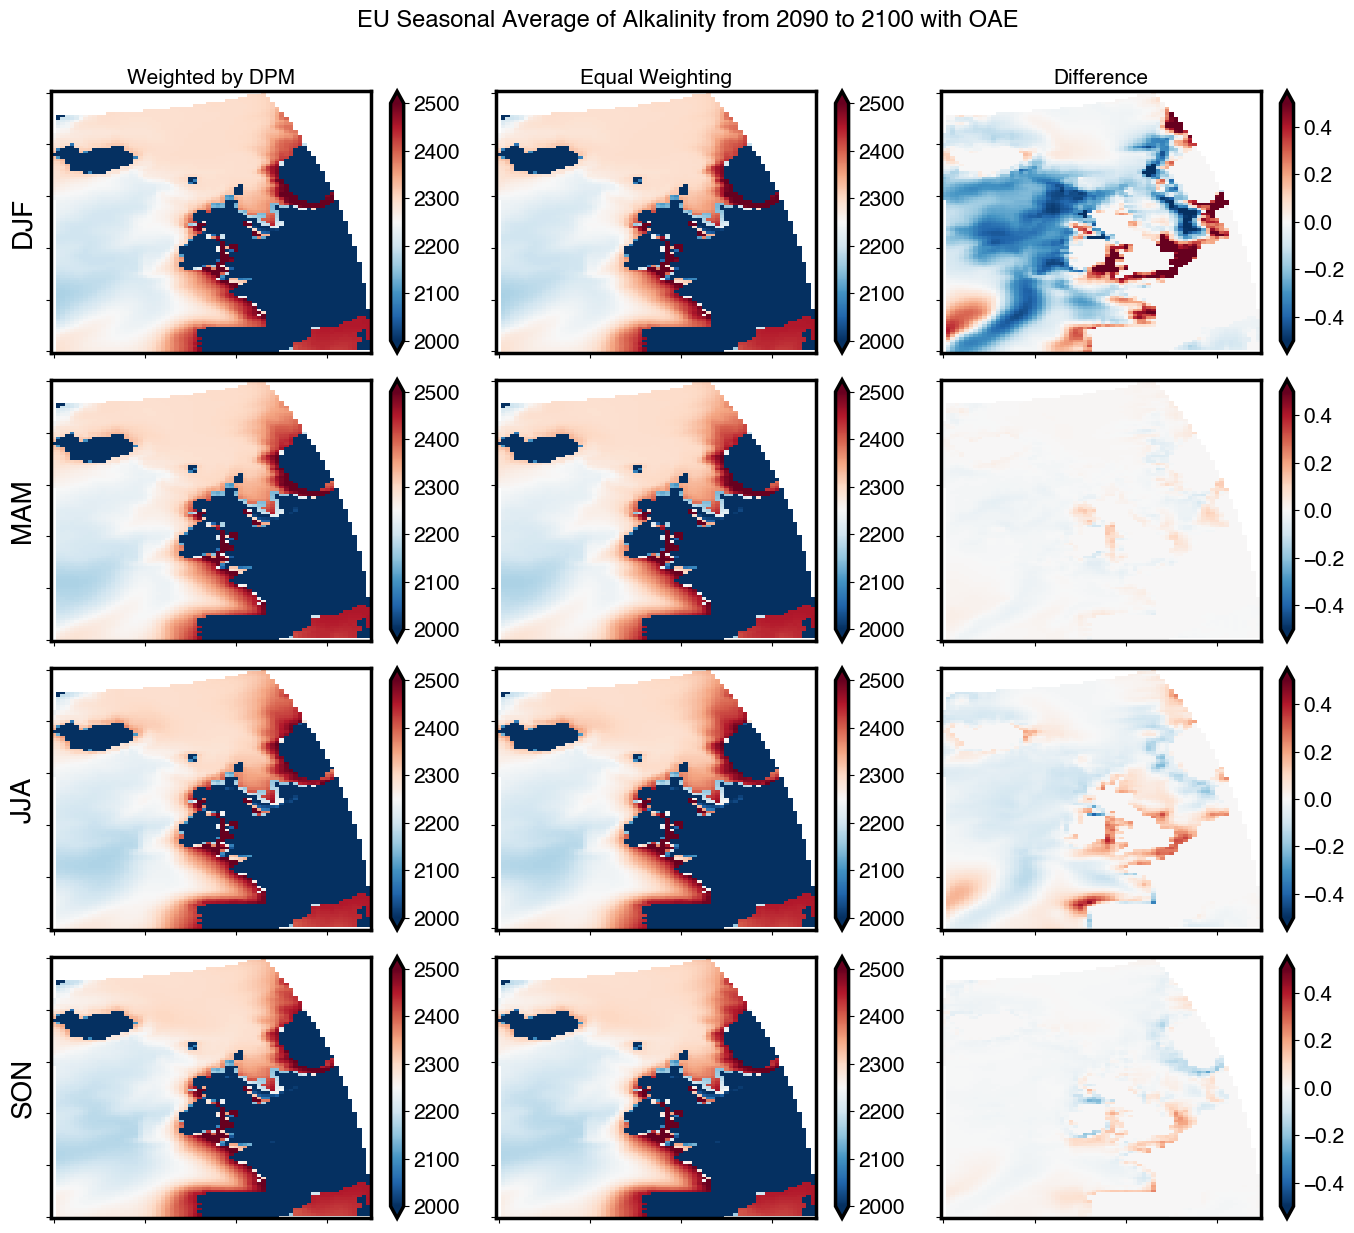

In [64]:
notnull = pd.notnull(ds_unweighted_baseline["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of Alkalinity from 2090 to 2100 without OAE

In [65]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

ALK_baseline_month = data_baseline["ALK"].sel(time_counter=slice(start_date_month, end_date_month))

In [66]:
ALK_month_summary_baseline = ALK_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
ALK_month_mean_all_years_baseline = ALK_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
ALK_monthly_mean_baseline = ALK_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [67]:
ALK_oae_month = data_oae["ALK"].sel(time_counter=slice(start_date_month, end_date_month))

In [68]:
ALK_month_summary_oae = ALK_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
ALK_month_mean_all_years_oae = ALK_oae_month.resample(time_counter='M').mean(keep_attrs=True)
ALK_monthly_mean_oae = ALK_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

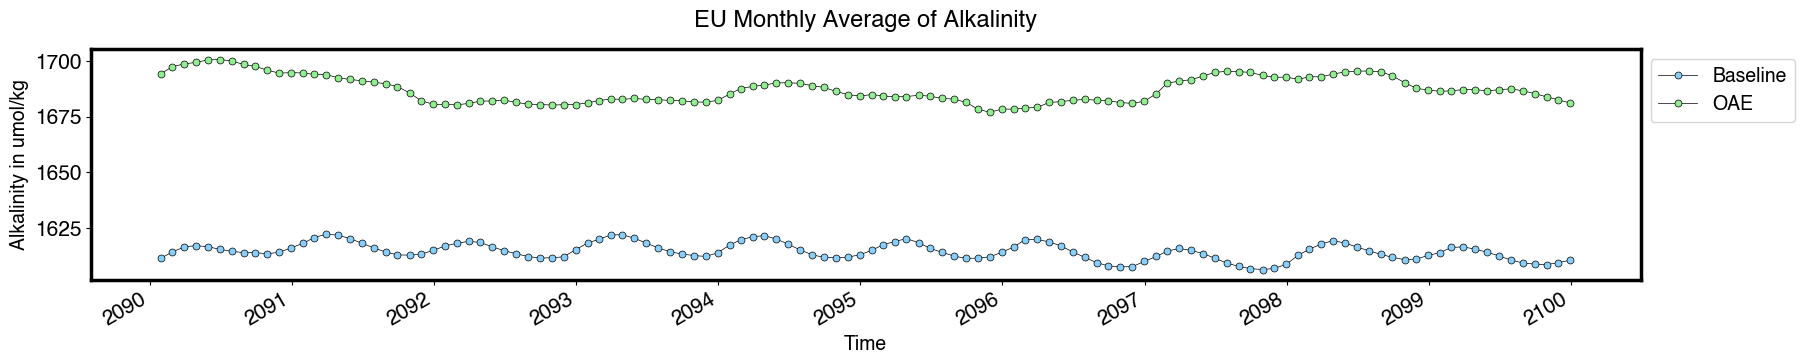

In [134]:
f, ax = plt.subplots(figsize=(20, 3))

ALK_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ALK_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of Alkalinity from 2090 to 2100 without OAE

In [70]:
ALK_baseline_monthly = ALK_monthly_mean_baseline.to_dataframe('ALK')
ALK_baseline_monthly['Month'] = pd.DatetimeIndex(ALK_baseline_monthly.index).month

In [71]:
conditions = [
    (ALK_baseline_monthly['Month'] == 1),
    (ALK_baseline_monthly['Month'] == 2),
    (ALK_baseline_monthly['Month'] == 3),
    (ALK_baseline_monthly['Month'] == 4),
    (ALK_baseline_monthly['Month'] == 5),
    (ALK_baseline_monthly['Month'] == 6),
    (ALK_baseline_monthly['Month'] == 7),
    (ALK_baseline_monthly['Month'] == 8),
    (ALK_baseline_monthly['Month'] == 9),
    (ALK_baseline_monthly['Month'] == 10),
    (ALK_baseline_monthly['Month'] == 11),
    (ALK_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ALK_baseline_monthly['Month'] = np.select(conditions, values)

In [72]:
colors = dict(zip(ALK_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

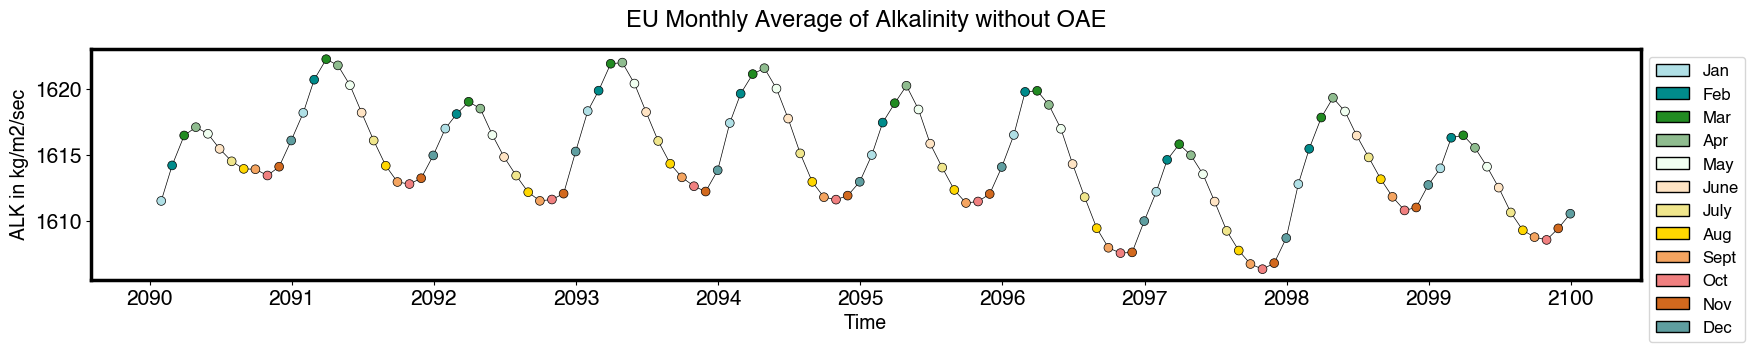

In [73]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ALK_baseline_monthly.index, ALK_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_baseline_monthly.index, ALK_baseline_monthly.ALK, color=ALK_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Alkalinity from 2090 to 2100 with OAE

In [74]:
ALK_oae_monthly = ALK_monthly_mean_oae.to_dataframe('ALK')
ALK_oae_monthly['Month'] = pd.DatetimeIndex(ALK_oae_monthly.index).month

In [75]:
conditions = [
    (ALK_oae_monthly['Month'] == 1),
    (ALK_oae_monthly['Month'] == 2),
    (ALK_oae_monthly['Month'] == 3),
    (ALK_oae_monthly['Month'] == 4),
    (ALK_oae_monthly['Month'] == 5),
    (ALK_oae_monthly['Month'] == 6),
    (ALK_oae_monthly['Month'] == 7),
    (ALK_oae_monthly['Month'] == 8),
    (ALK_oae_monthly['Month'] == 9),
    (ALK_oae_monthly['Month'] == 10),
    (ALK_oae_monthly['Month'] == 11),
    (ALK_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ALK_oae_monthly['Month'] = np.select(conditions, values)

In [76]:
colors = dict(zip(ALK_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

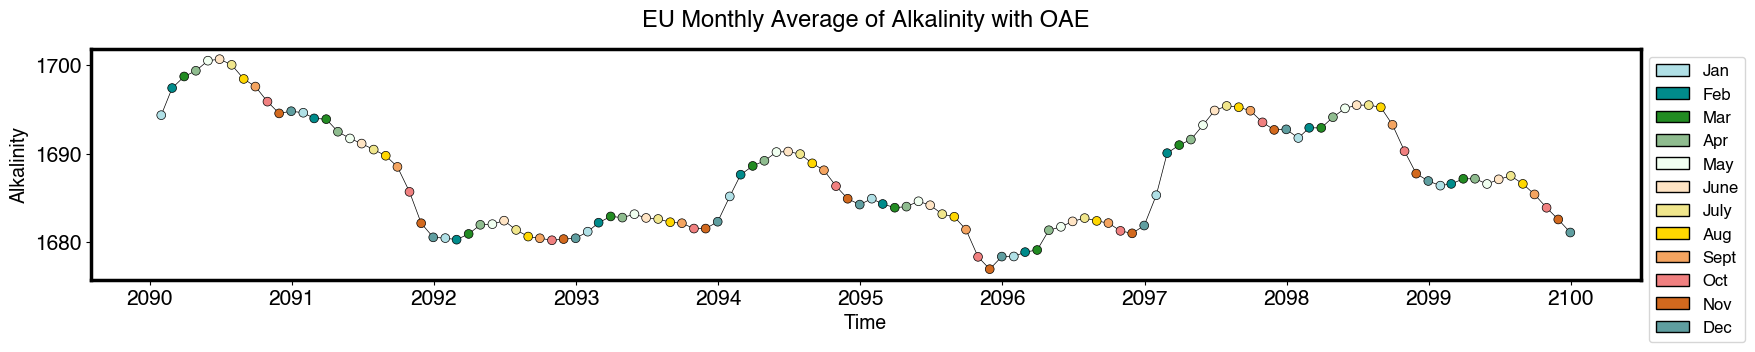

In [117]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ALK_oae_monthly.index, ALK_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_oae_monthly.index, ALK_oae_monthly.ALK, color=ALK_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity from 2090 to 2100 with and without OAE

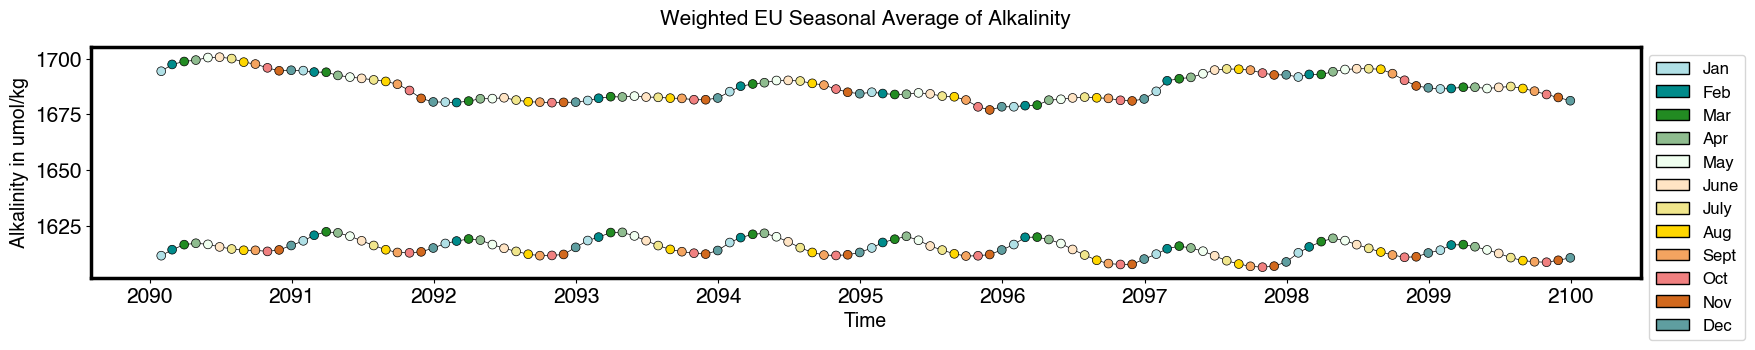

In [118]:
colors = dict(zip(ALK_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ALK_baseline_monthly.index, ALK_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_baseline_monthly.index, ALK_baseline_monthly.ALK, color=ALK_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(ALK_oae_monthly.index, ALK_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ALK_oae_monthly.index, ALK_oae_monthly.ALK, color=ALK_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=15, y=1.06)

pass

### Δ ALK between Baseline and OAE from 2090 to 2100

In [119]:
delta_ALK = ALK_baseline_monthly.ALK - ALK_oae_monthly.ALK

In [120]:
delta_ALK = delta_ALK.to_xarray()

In [121]:
delta_ALK = delta_ALK.to_dataframe('ALK')
delta_ALK['Month'] = pd.DatetimeIndex(delta_ALK.index).month

In [122]:
conditions = [
    (delta_ALK['Month'] == 1),
    (delta_ALK['Month'] == 2),
    (delta_ALK['Month'] == 3),
    (delta_ALK['Month'] == 4),
    (delta_ALK['Month'] == 5),
    (delta_ALK['Month'] == 6),
    (delta_ALK['Month'] == 7),
    (delta_ALK['Month'] == 8),
    (delta_ALK['Month'] == 9),
    (delta_ALK['Month'] == 10),
    (delta_ALK['Month'] == 11),
    (delta_ALK['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_ALK['Month'] = np.select(conditions, values)

In [123]:
colors = dict(zip(delta_ALK.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

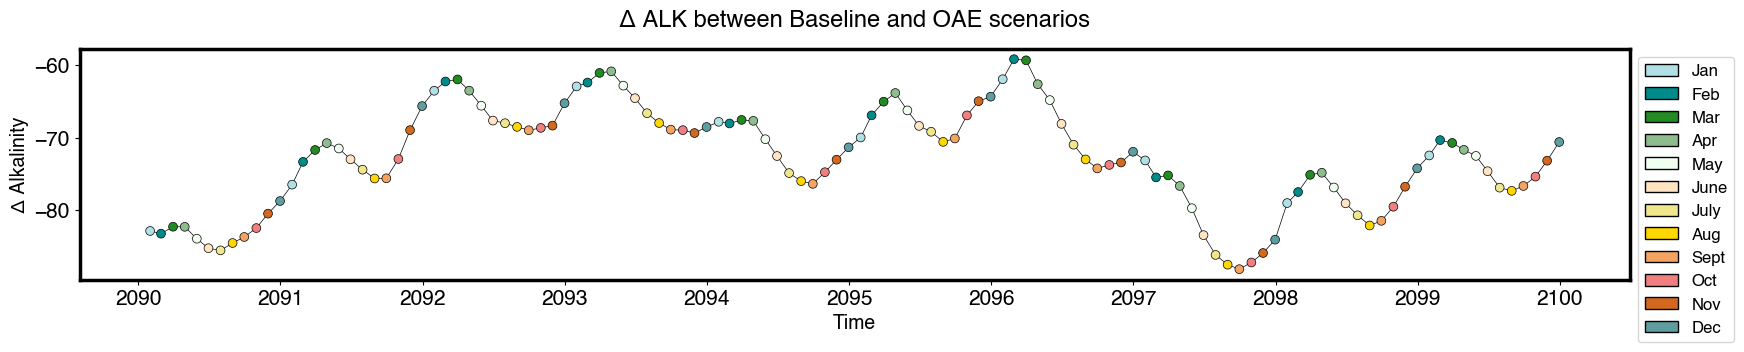

In [124]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ALK.index, delta_ALK.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ALK.index, delta_ALK.ALK, color=delta_ALK.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity', fontsize=14)
ax.set_title("Δ ALK between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

### ALK Annual Amplitude without OAE

In [125]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [126]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmax().values]

In [127]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmin().values]

In [128]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [129]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [130]:
ALK_amplitude_baseline = year_max_baseline['ALK'] - year_min_baseline['ALK']

In [131]:
ALK_amplitude_baseline = ALK_amplitude_baseline.to_xarray()

In [132]:
ALK_amplitude_baseline = ALK_amplitude_baseline.to_dataset()

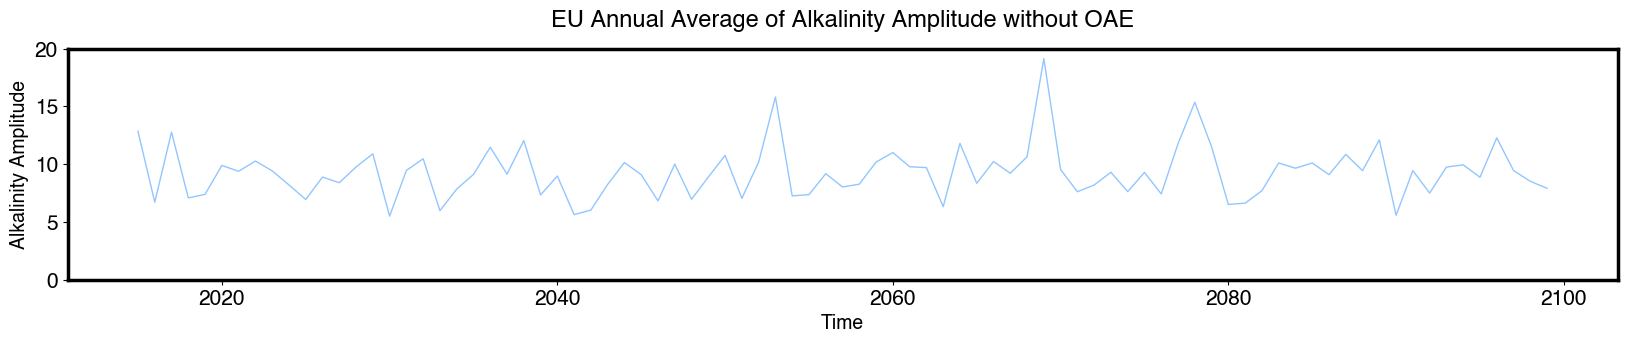

In [133]:
plt.figure(figsize=(20, 3))
plt.plot(ALK_amplitude_baseline.year, ALK_amplitude_baseline.ALK, linewidth=1)
plt.ylim(0, 20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### ALK Annual Amplitude with OAE

In [100]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [104]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmax().values]

In [105]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmin().values]

In [106]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [107]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [108]:
ALK_amplitude_oae = year_max_oae['ALK'] - year_min_oae['ALK']

In [109]:
ALK_amplitude_oae = ALK_amplitude_oae.to_xarray()

In [110]:
ALK_amplitude_oae = ALK_amplitude_oae.to_dataset()

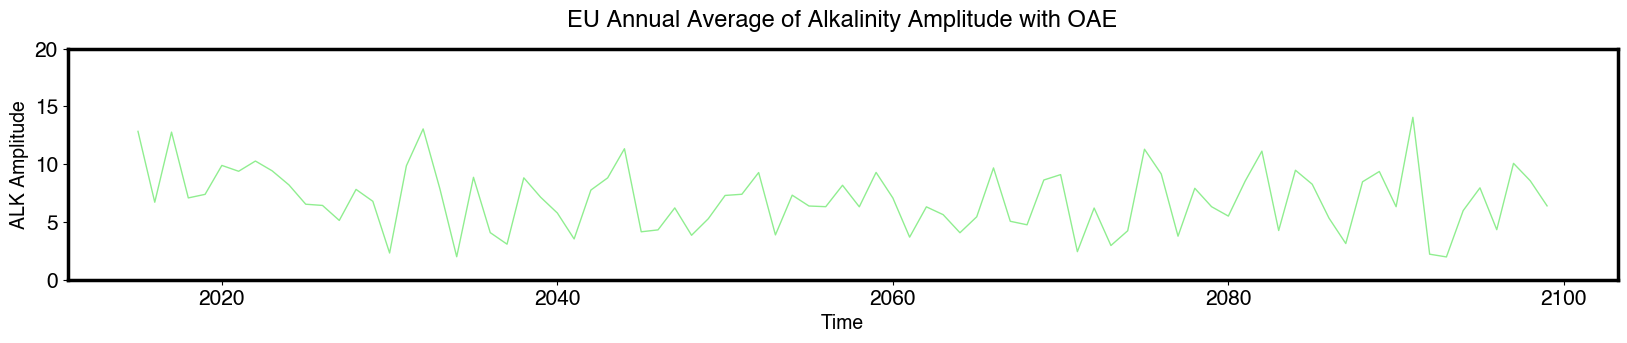

In [111]:
plt.figure(figsize=(20, 3))
plt.plot(ALK_amplitude_oae.year, ALK_amplitude_oae.ALK, linewidth=1, color='lightgreen')
plt.ylim(0, 20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### ALK Annual Amplitude with and without OAE

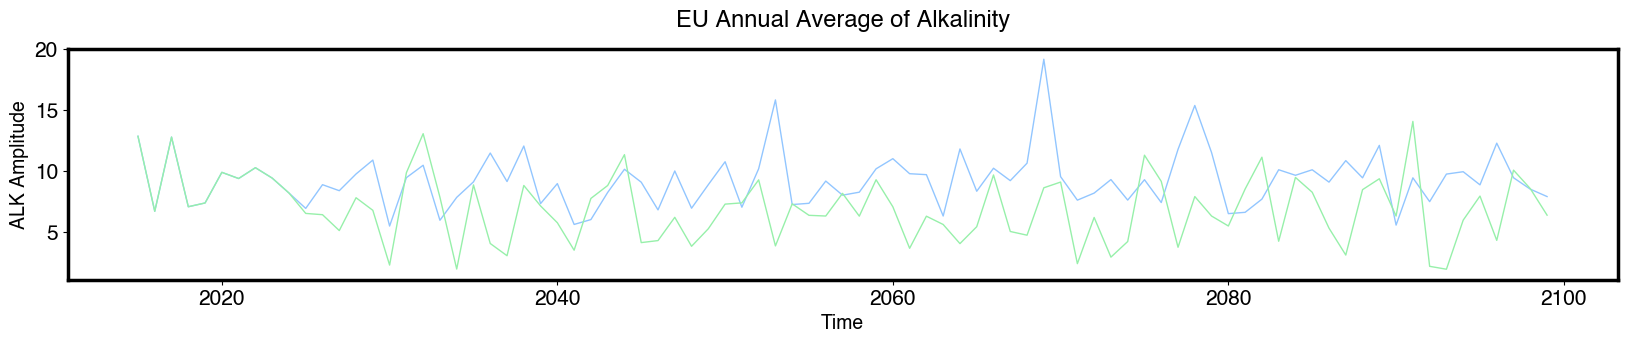

In [112]:
plt.figure(figsize=(20, 3))
plt.plot(ALK_amplitude_baseline.year, ALK_amplitude_baseline.ALK, linewidth=1, label = 'Baseline')
plt.plot(ALK_amplitude_oae.year, ALK_amplitude_oae.ALK, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [113]:
ALK_amplitude_baseline_pct = ALK_amplitude_baseline.to_dataframe()
ALK_amplitude_oae_pct = ALK_amplitude_oae.to_dataframe()

In [114]:
ALK_amplitude_baseline_pct = ALK_amplitude_baseline_pct.pct_change()
ALK_amplitude_oae_pct = ALK_amplitude_oae_pct.pct_change()

In [115]:
ALK_amplitude_baseline_pct = ALK_amplitude_baseline_pct.to_xarray()
ALK_amplitude_oae_pct = ALK_amplitude_oae_pct.to_xarray()

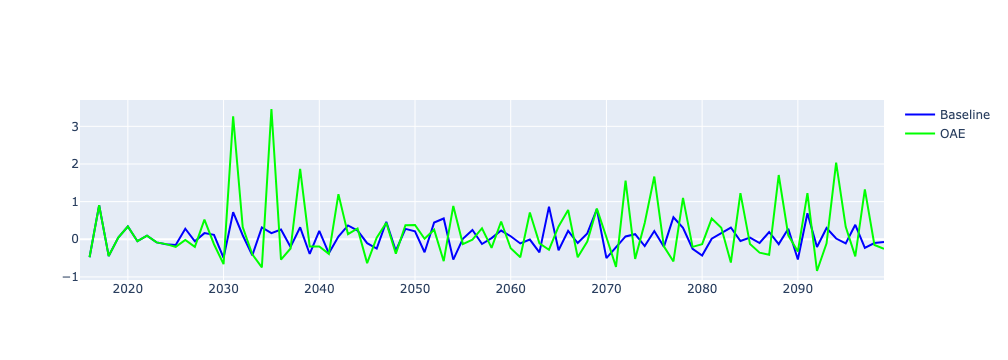

In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ALK_amplitude_baseline_pct.year, y=ALK_amplitude_baseline_pct['ALK'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=ALK_amplitude_oae_pct.year, y=ALK_amplitude_oae_pct['ALK'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()